In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
import seaborn as sns
import os

# Carregar o arquivo CSV
df = pd.read_csv('pns2019.csv', usecols=['V0001', 'Q06306', 'Q064'])

# Selecionar colunas específicas
colunas_selecionadas = ['V0001', 'Q06306', 'Q064']
dornocoracao = df[colunas_selecionadas]

# Substituir strings que representam NaN por NaN do pandas
dornocoracao['Q06306'] = pd.to_numeric(dornocoracao['Q06306'], errors='coerce')
dornocoracao['Q064'] = pd.to_numeric(dornocoracao['Q064'], errors='coerce')

# Remover linhas onde Q06306 ou Q064 são NaN
dornocoracao_limpo = dornocoracao.dropna(subset=['Q06306', 'Q064'])

# Verificar os dados após a limpeza
print(dornocoracao_limpo['Q06306'].unique())
print(dornocoracao_limpo.head())

# Mapear códigos de estado para nomes
mapeamento_estados = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

# Mapear estados para regiões
mapeamento_regioes = {
    'Norte': ['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins'],
    'Nordeste': ['Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia'],
    'Sudeste': ['Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo'],
    'Sul': ['Paraná', 'Santa Catarina', 'Rio Grande do Sul'],
    'Centro-Oeste': ['Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal']
}

# Substituir os códigos pelos nomes dos estados
dornocoracao_limpo['V0001'] = dornocoracao_limpo['V0001'].map(mapeamento_estados)

# Mapear estados para regiões
def estado_para_regiao(estado):
    for regiao, estados in mapeamento_regioes.items():
        if estado in estados:
            return regiao
    return None

dornocoracao_limpo['Região'] = dornocoracao_limpo['V0001'].apply(estado_para_regiao)

# Filtrar apenas pessoas com doença do coração
doentes_coracao = dornocoracao_limpo[dornocoracao_limpo['Q06306'] == 1]

[1.]
     V0001  Q06306  Q064
181     11     1.0  15.0
219     11     1.0  56.0
248     11     1.0  66.0
384     11     1.0  15.0
437     11     1.0  60.0


C:\Users\llays\AppData\Local\Temp\ipykernel_33300\2080813978.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dornocoracao_limpo['V0001'] = dornocoracao_limpo['V0001'].map(mapeamento_estados)
C:\Users\llays\AppData\Local\Temp\ipykernel_33300\2080813978.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dornocoracao_limpo['Região'] = dornocoracao_limpo['V0001'].apply(estado_para_regiao)


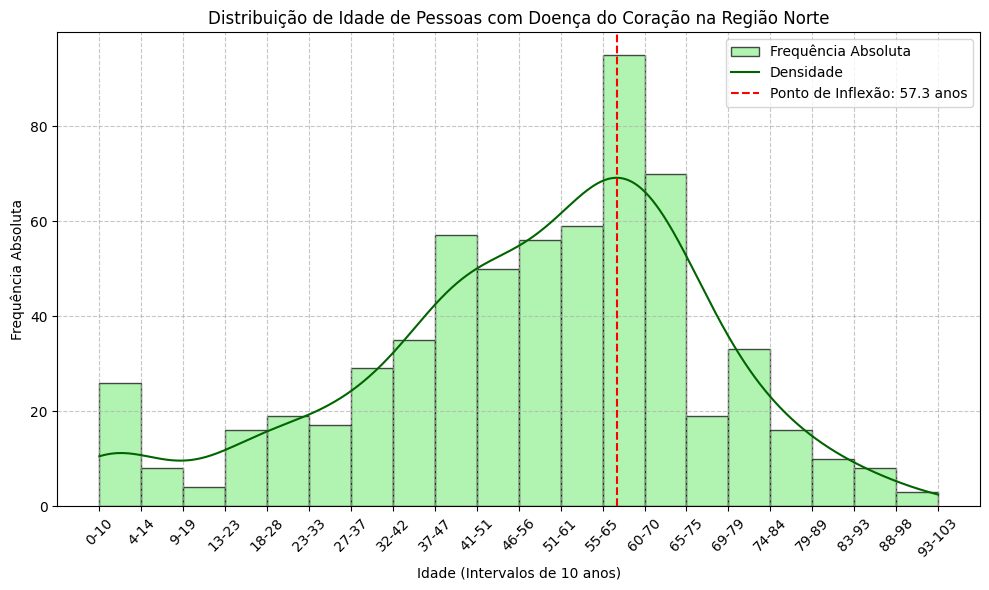

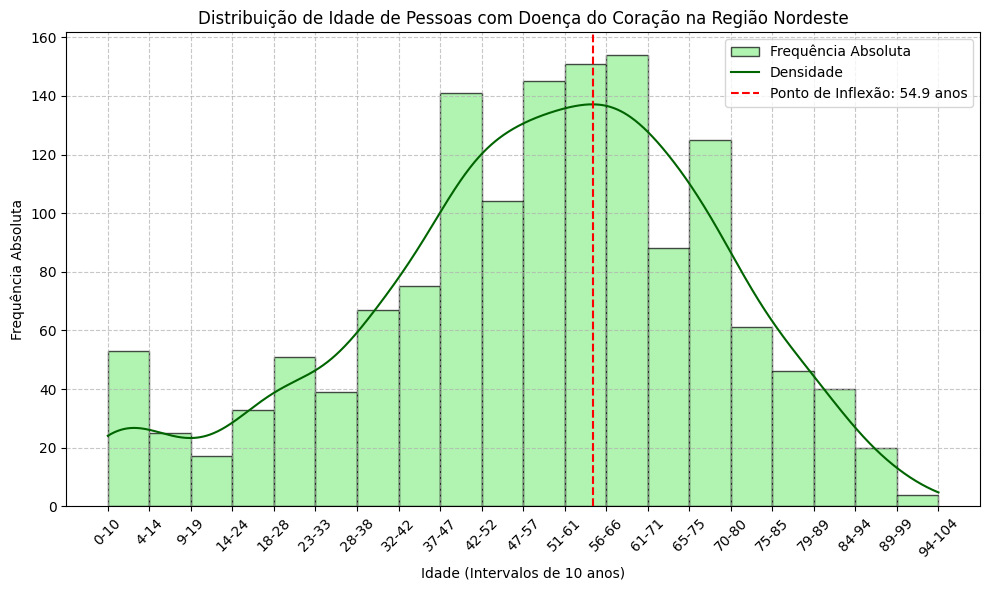

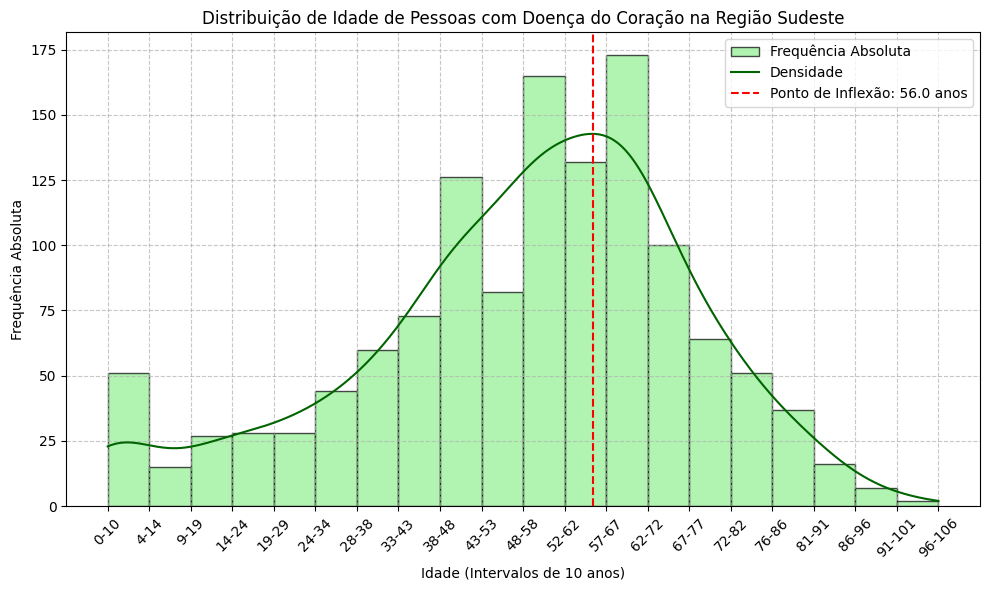

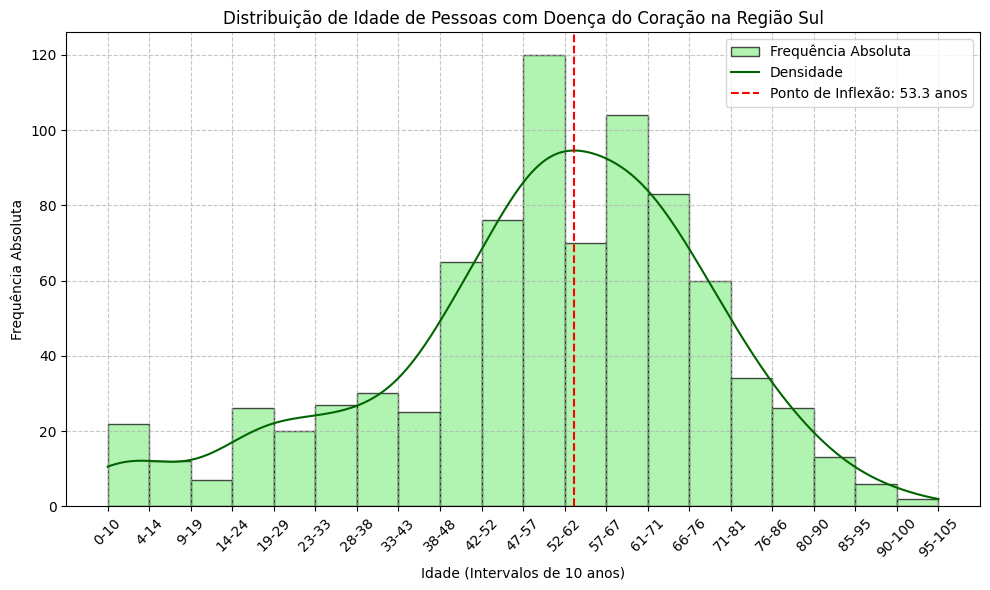

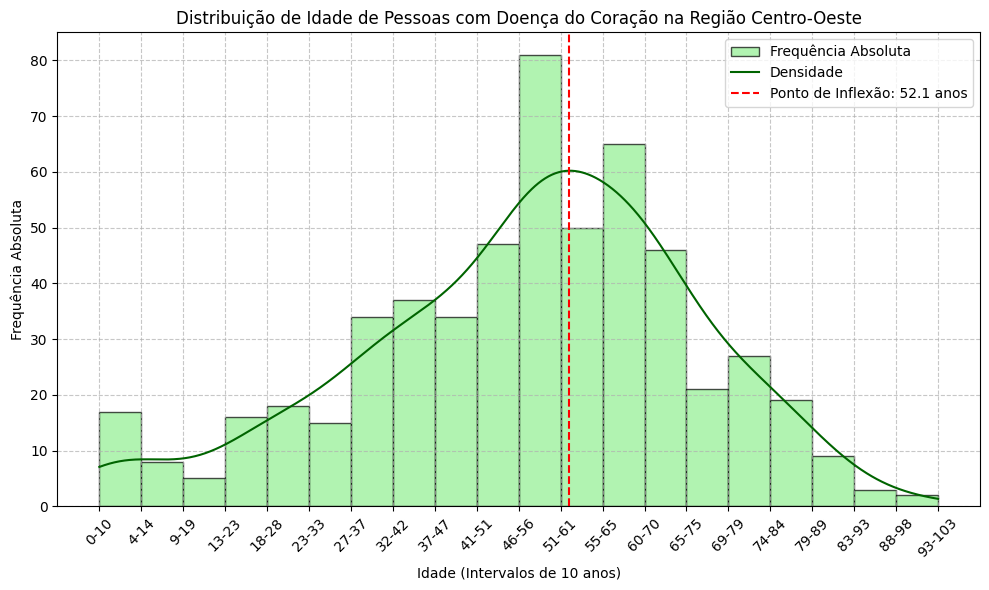

In [5]:
# Supondo que 'doentes_coracao' já está definido
regioes = doentes_coracao['Região'].unique()

for regiao in regioes:
    dados_regiao = doentes_coracao[doentes_coracao['Região'] == regiao]
    idades = dados_regiao['Q064']
    
    # Criar o histograma
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(idades, bins=20, color='lightgreen', edgecolor='black', alpha=0.7, label='Frequência Absoluta')
    
    # Adicionar a linha de densidade
    densidade = gaussian_kde(idades)
    x = np.linspace(idades.min(), idades.max(), 1000)
    plt.plot(x, densidade(x) * len(idades) * (bins[1] - bins[0]), color='darkgreen', label='Densidade')
    
    # Encontrar o ponto de inflexão (máximo da densidade)
    ponto_inflexao = x[np.argmax(densidade(x))]
    plt.axvline(ponto_inflexao, color='red', linestyle='--', label=f'Ponto de Inflexão: {ponto_inflexao:.1f} anos')
    
    # Configurações do gráfico
    plt.xlabel('Idade (Intervalos de 10 anos)')
    plt.ylabel('Frequência Absoluta')
    plt.title(f'Distribuição de Idade de Pessoas com Doença do Coração na Região {regiao}')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Ajustar os rótulos do eixo x
    plt.xticks(bins, [f'{int(b)}-{int(b)+10}' for b in bins], rotation=45)  # Rótulos detalhados
    plt.tight_layout()
    
    # Caminho da pasta onde o gráfico será salvo
    caminho_da_pasta = "Imagens"

    # Verificar se a pasta existe; se não, criá-la
    if not os.path.exists(caminho_da_pasta):
        os.makedirs(caminho_da_pasta)

    # Nome do arquivo
    nome_arquivo = f"grafico_doencas_coracao_absoluto_idade_{regiao}.png"

    # Caminho completo (juntando a pasta e o nome do arquivo)
    caminho_completo = os.path.join(caminho_da_pasta, nome_arquivo)

    # Salvar o gráfico como um arquivo PNG
    plt.savefig(caminho_completo, dpi=300, bbox_inches='tight')

    # Mostrar o gráfico na tela
    plt.show()

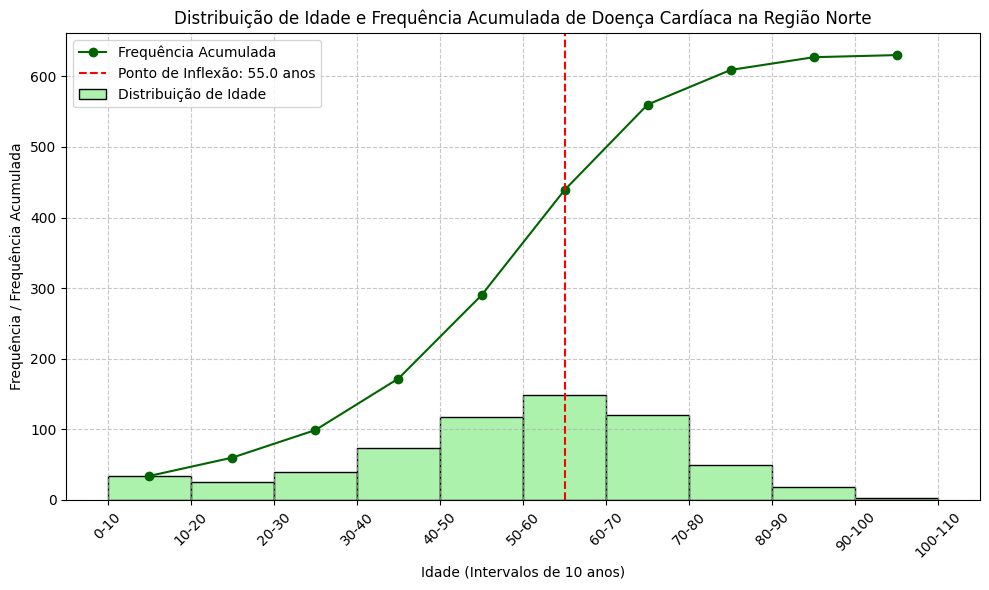

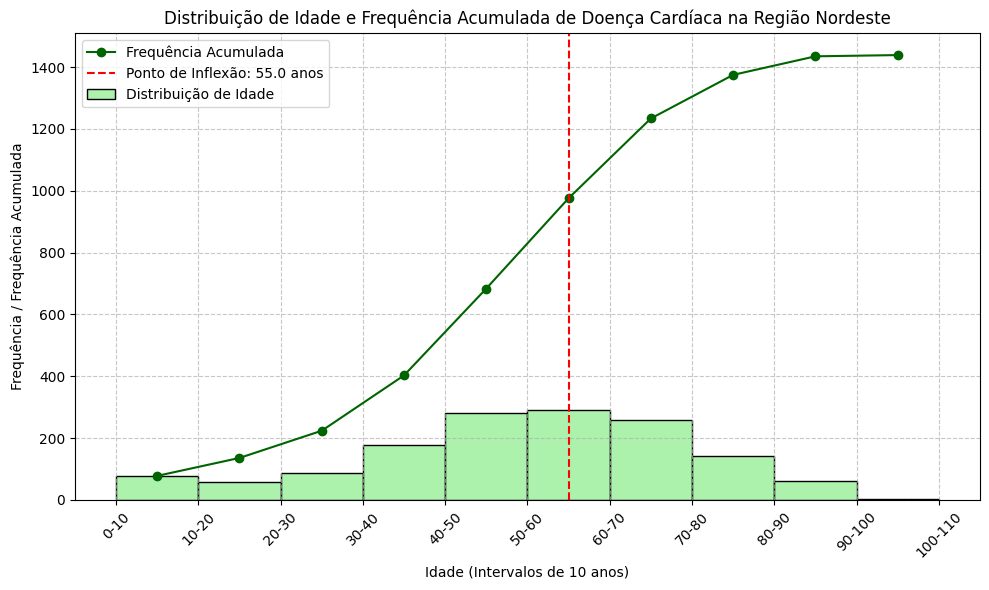

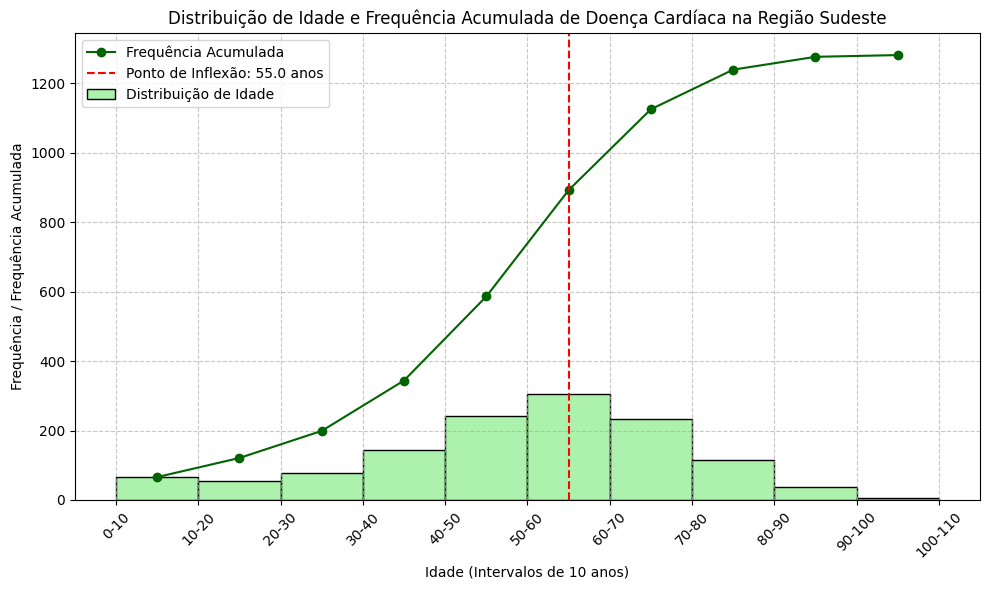

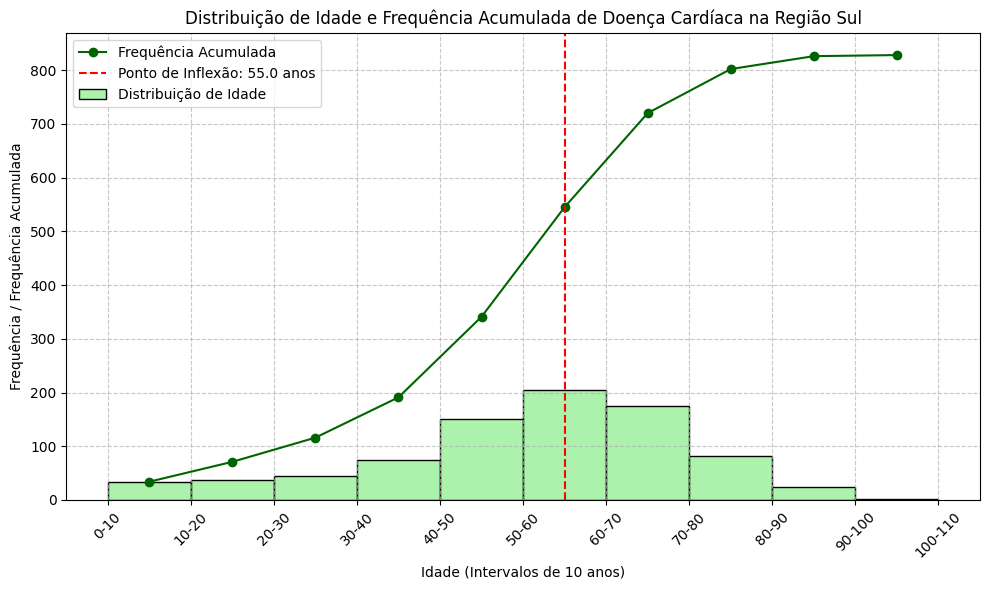

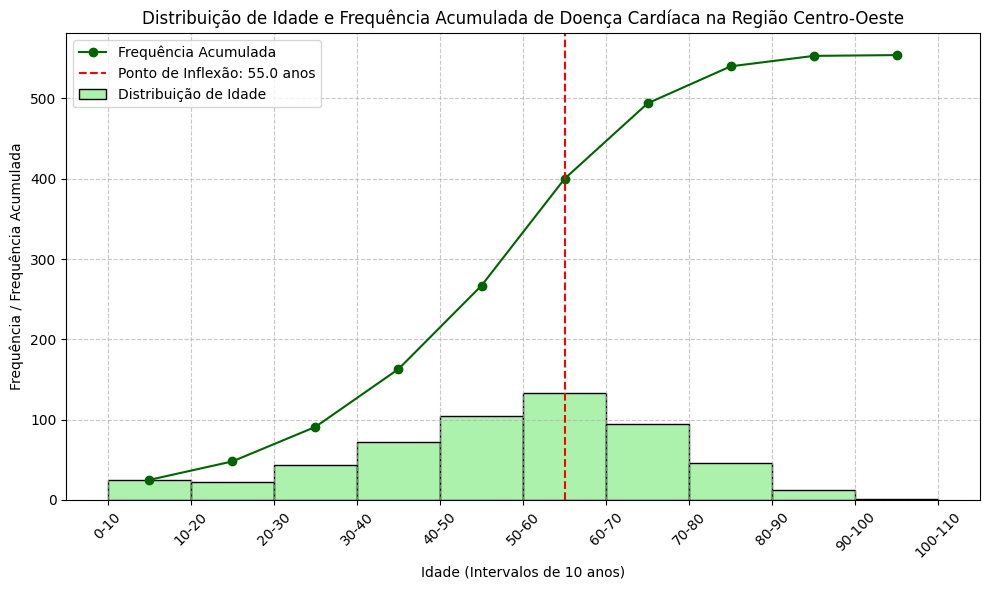

In [ ]:
# Supondo que 'doentes_coracao' já está definido
regioes = doentes_coracao['Região'].unique()

# Definir os bins (intervalos de idade)
bins = np.arange(0, 110, 10)  # Intervalos de 10 em 10 anos

for regiao in regioes:
    dados_regiao = doentes_coracao[doentes_coracao['Região'] == regiao]
    
    # Criar o histograma
    plt.figure(figsize=(10, 6))
    sns.histplot(dados_regiao['Q064'], bins=bins, color='lightgreen', edgecolor='black', kde=False, label='Distribuição de Idade')
    
    # Calcular a frequência acumulada
    freq_acumulada = np.cumsum(np.histogram(dados_regiao['Q064'], bins=bins)[0])
    pontos_medio_bins = bins[:-1] + np.diff(bins) / 2  # Pontos médios dos bins
    
    # Plotar a frequência acumulada
    plt.plot(pontos_medio_bins, freq_acumulada, color='darkgreen', marker='o', label='Frequência Acumulada')
    
    # Encontrar o ponto de inflexão (máxima taxa de variação)
    diff_freq = np.diff(freq_acumulada)
    ponto_inflexao = pontos_medio_bins[np.argmax(diff_freq) + 1]
    
    # Destacar o ponto de inflexão
    plt.axvline(ponto_inflexao, color='red', linestyle='--', label=f'Ponto de Inflexão: {ponto_inflexao:.1f} anos')
    
    # Configurações do gráfico
    plt.title(f'Distribuição de Idade e Frequência Acumulada de Doença Cardíaca na Região {regiao}')
    plt.xlabel('Idade (Intervalos de 10 anos)')
    plt.ylabel('Frequência / Frequência Acumulada')
    plt.legend(loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Ajustar os rótulos do eixo x
    plt.xticks(bins, [f'{int(b)}-{int(b)+10}' for b in bins], rotation=45)  # Rótulos detalhados
    plt.tight_layout()

    # Nome do arquivo
    nome_arquivo = f"grafico_doencas_coracao_acumulado_idade_{regiao}.png"

    # Caminho completo (juntando a pasta e o nome do arquivo)
    caminho_completo = os.path.join(caminho_da_pasta, nome_arquivo)

    # Salvar o gráfico como um arquivo PNG
    plt.savefig(caminho_completo, dpi=300, bbox_inches='tight')

    # Mostrar o gráfico na tela
    plt.show()

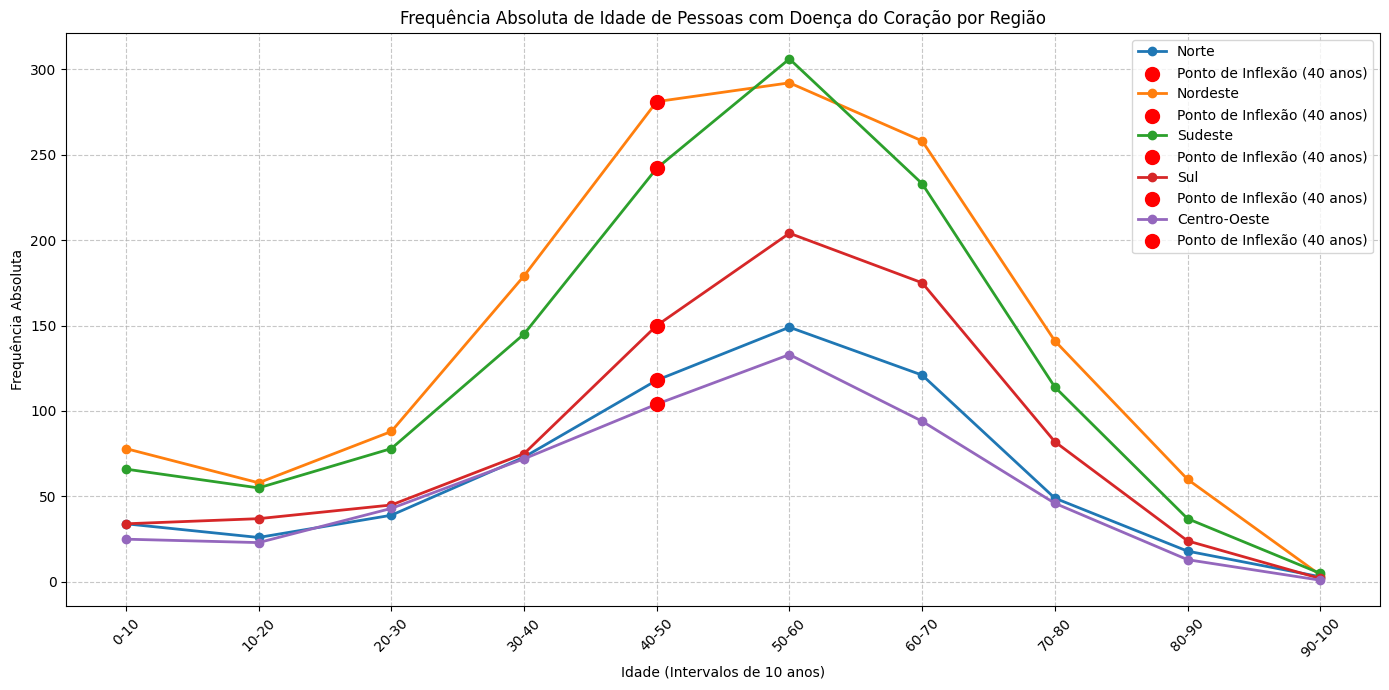

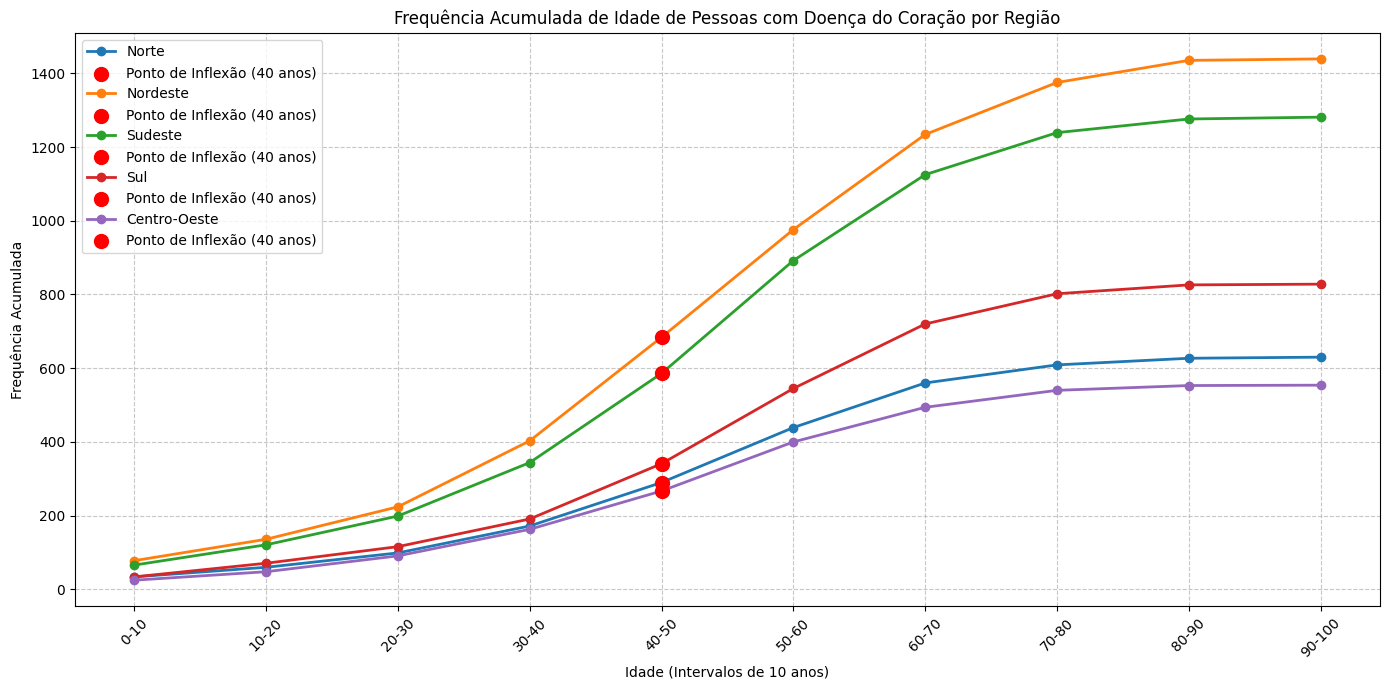

In [ ]:
# Função para calcular frequência absoluta e acumulada
def calcular_frequencias(idades, bins):
    freq, _ = np.histogram(idades, bins=bins)
    freq_acumulada = np.cumsum(freq)
    return freq, freq_acumulada

# Função para encontrar o ponto de inflexão
def encontrar_ponto_inflexao(freq_acumulada):
    derivada = np.diff(freq_acumulada)  # Calcula a primeira derivada
    ponto_inflexao = np.argmax(derivada)  # Encontra o índice do ponto de inflexão
    return ponto_inflexao

# Definir os bins (intervalos de idade)
bins = np.arange(0, 110, 10)  # Intervalos de 10 em 10 anos

# Gráfico de segmentos: Frequência Absoluta
plt.figure(figsize=(14, 7))
for regiao in regioes:
    dados_regiao = doentes_coracao[doentes_coracao['Região'] == regiao]
    idades = dados_regiao['Q064']
    freq, freq_acumulada = calcular_frequencias(idades, bins)
    
    # Plotar a frequência absoluta
    plt.plot(bins[:-1], freq, marker='o', label=regiao, linewidth=2)

    # Encontrar e marcar o ponto de inflexão
    ponto_inflexao = encontrar_ponto_inflexao(freq_acumulada)
    plt.scatter(bins[ponto_inflexao], freq[ponto_inflexao], color='red', s=100, zorder=5, 
                label=f'Ponto de Inflexão ({bins[ponto_inflexao]} anos)')

plt.xlabel('Idade (Intervalos de 10 anos)')
plt.ylabel('Frequência Absoluta')
plt.title('Frequência Absoluta de Idade de Pessoas com Doença do Coração por Região')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar os rótulos do eixo x
plt.xticks(bins[:-1], [f'{int(b)}-{int(b)+10}' for b in bins[:-1]], rotation=45)  # Rótulos detalhados
plt.tight_layout()

# Nome do arquivo
nome_arquivo = "grafico_doencas_coracao_absoluto_idade.png"

# Caminho completo (juntando a pasta e o nome do arquivo)
caminho_completo = os.path.join(caminho_da_pasta, nome_arquivo)

# Salvar o gráfico como um arquivo PNG
plt.savefig(caminho_completo, dpi=300, bbox_inches='tight')

# Mostrar o gráfico na tela
plt.show()

# Gráfico de segmentos: Frequência Acumulada
plt.figure(figsize=(14, 7))
for regiao in regioes:
    dados_regiao = doentes_coracao[doentes_coracao['Região'] == regiao]
    idades = dados_regiao['Q064']
    _, freq_acumulada = calcular_frequencias(idades, bins)
    
    # Plotar a frequência acumulada
    plt.plot(bins[:-1], freq_acumulada, marker='o', label=regiao, linewidth=2)

    # Encontrar e marcar o ponto de inflexão
    ponto_inflexao = encontrar_ponto_inflexao(freq_acumulada)
    plt.scatter(bins[ponto_inflexao], freq_acumulada[ponto_inflexao], color='red', s=100, zorder=5, 
                label=f'Ponto de Inflexão ({bins[ponto_inflexao]} anos)')

plt.xlabel('Idade (Intervalos de 10 anos)')
plt.ylabel('Frequência Acumulada')
plt.title('Frequência Acumulada de Idade de Pessoas com Doença do Coração por Região')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar os rótulos do eixo x
plt.xticks(bins[:-1], [f'{int(b)}-{int(b)+10}' for b in bins[:-1]], rotation=45)  # Rótulos detalhados
plt.tight_layout()

# Caminho da pasta onde o gráfico será salvo
caminho_da_pasta = "Imagens"

# Verificar se a pasta existe; se não, criá-la
if not os.path.exists(caminho_da_pasta):
    os.makedirs(caminho_da_pasta)

# Nome do arquivo
nome_arquivo = "grafico_doencas_coracao_acumulado_idade.png"

# Caminho completo (juntando a pasta e o nome do arquivo)
caminho_completo = os.path.join(caminho_da_pasta, nome_arquivo)

# Salvar o gráfico como um arquivo PNG
plt.savefig(caminho_completo, dpi=300, bbox_inches='tight')

# Mostrar o gráfico na tela
plt.show()